# BEMM458J Final assignment

## You are a business analyst at the marketing department of Coca Cola. There is an increasing debate on social media in relation to the negative impact of plastic consumption on the environment.

## As of recently NGOs have started campaigning against Coca Cola and other multinationals. 

## General management needs you to conduct an analysis of recent conversations posted on Twitter for the purposes of determining the communication strategies followed by NGOs and how Coca Cola must engage on social media.

In [1]:
import pandas as pd
import time

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.options.display.max_colwidth = 400

In [4]:


ConversationsLean=pd.read_csv('../data/ConversationsLean.csv')

In [5]:
ConversationsLean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   447 non-null    int64  
 1   tweet.created_at             447 non-null    object 
 2   tweet.id                     447 non-null    float64
 3   tweet.full_text              447 non-null    object 
 4   tweet.entities               447 non-null    object 
 5   tweet.user.id                447 non-null    int64  
 6   tweet.user.screen_name       447 non-null    object 
 7   tweet.user.followers_count   447 non-null    int64  
 8   tweet.user.friends_count     447 non-null    int64  
 9   tweet.user.favourites_count  447 non-null    int64  
 10  tweet.user.statuses_count    447 non-null    int64  
 11  tweet.retweet_count          447 non-null    float64
 12  tweet.favorite_count         447 non-null    float64
 13  tweet.favorited     

In [6]:
ConversationsLean.iloc[50]

Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                   4
tweet.created_at                                                                                                                                                                                                                                                                                                                                                                                                    2019-12-17 19:50:37.000000
tweet.id                                                                                                                                  

In [7]:
ConversationsLean.sample(3)

,Unnamed: 0,tweet.created_at,tweet.id,tweet.full_text,tweet.entities,tweet.user.id,tweet.user.screen_name,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,...,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic,stakeholder
25,25,2018-11-15 18:29:02.000000,1.063137e+18,"Today is #AmericaRecyclesDay! Did you know the current rate of #recycling in America is only 34%? We can do better! Let's reduce, refuse, reuse, and then recycle as much as we can.","{'hashtags': [{'text': 'AmericaRecyclesDay', 'indices': [9, 28]}, {'text': 'recycling', 'indices': [63, 73]}], 'symbols': [], 'user_mentions': [], 'urls': []}",541280211,Algalita,2865,696,1778,...,0.044202,0.230007,0.034135,0.002077,0.003520,0.003146,0.001699,0.001884,0.010397,Scientific
434,8,2017-10-28 21:40:03.000000,9.243903e+17,"#DidYouKnow If you switch to #reusable bags, you’ll save about 500-700 plastic bags from our landfills and environment every year!","{'hashtags': [{'text': 'DidYouKnow', 'indices': [0, 11]}, {'text': 'reusable', 'indices': [29, 38]}], 'symbols': [], 'user_mentions': [], 'urls': []}",71310291,PlasticPollutes,45953,6595,13453,...,0.049960,0.504449,0.052900,0.002133,0.003329,0.002634,0.001941,0.001931,0.007630,NGO
105,59,2019-12-24 19:01:06.000000,1.209550e+18,Want to help fight plastic pollution next year?\nHere’s what you can do in your community!\n#BreakFreeFromPlastic\nhttps://t.co/7VsKA9ELsV https://t.co/4YNi8nNhQu,"{'hashtags': [{'text': 'BreakFreeFromPlastic', 'indices': [90, 111]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/7VsKA9ELsV', 'expanded_url': 'https://act.gp/2PqKYV4', 'display_url': 'act.gp/2PqKYV4', 'indices': [112, 135]}], 'media': [{'id': 1209549575276630016, 'id_str': '1209549575276630016', 'indices': [136, 159], 'media_url': 'http://pbs.twimg.com/media/EMku7iSWkA...",3459051,Greenpeace,1867284,4002,8752,...,0.066467,0.154992,0.056052,0.002109,0.003637,0.003049,0.002025,0.002086,0.010674,NGO


In [8]:
ConversationsLean.groupby('stakeholder').count()

,Unnamed: 0,tweet.created_at,tweet.id,tweet.full_text,tweet.entities,tweet.user.id,tweet.user.screen_name,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,...,joy,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic
stakeholder,,,,,,,,,,,,,,,,,,,,,
Artist,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
Multinational,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
NGO,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,241
OtherInstitution,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
Scientific,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


## Task 1. Which Twitter users are the most popular ? (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: consider retweet and favorite counts as proxies for popularity

In [9]:
pop= ConversationsLean.groupby(['tweet.user.id','tweet.user.screen_name'])['tweet.retweet_count'].sum() 
+ ConversationsLean.groupby(['tweet.user.id','tweet.user.screen_name'])['tweet.user.favourites_count'].sum()

tweet.user.id        tweet.user.screen_name
3459051              Greenpeace                 192682
15071040             PlasticfreeBeth             94599
15675156             Maqueda                        72
16579346             HealTheBay                  98900
19868934             celinecousteau               4533
21346619             PepsiCo                      4776
23085995             Nestle                      96720
28081404             janettewallis               35590
36709257             captainplanetfd              8008
71310291             PlasticPollutes           1708531
85732762             5gyres                     119475
109224937            Unilever                    14712
172694825            WRAP_UK                     90298
216461261            NonToxicRev                  8616
293386968            GordonJMillar                 181
309207293            AdvScientists                3292
327698038            DRussoInnovate              21789
344230034            

In [10]:
pop.sort_values(ascending=False)

tweet.user.id        tweet.user.screen_name
71310291             PlasticPollutes           4242.0
3459051              Greenpeace                3941.0
85732762             5gyres                     569.0
541280211            Algalita                   540.0
172694825            WRAP_UK                    474.0
1362667831           NoPlasticStraws            453.0
23085995             Nestle                     228.0
15071040             PlasticfreeBeth            147.0
109224937            Unilever                   111.0
327698038            DRussoInnovate              91.0
16579346             HealTheBay                  66.0
861686077            MaxLiboiron                 56.0
28081404             janettewallis               53.0
21346619             PepsiCo                     52.0
216461261            NonToxicRev                 43.0
309207293            AdvScientists               43.0
975913893066231808   PlasticOceansUS             38.0
1074705907127385984  EndPlasticWaste  

Interpretation: The most popular Twitter users can be found by considering the two main columns 
'tweet.retweet_count' and 'tweet.user.favourites_count', based on the sum of both of these, and 
by using groupby() on them, I have extracted the'tweet.user.id' and 'tweet.user.screen_name' 
to figure out the Twitter user with the maximum popularity. Based on the output generated 
as shown above, I have interpreted that ‘PlasticPollutes’ is the most famous Twitter user with the 
highest popularity score of 1712773.0, followed by Greenpeace (popularity score = 196623.0), 
5gyres (popularity score = 120044.0), HealTheBay (popularity score = 98966.0) and Nestle (popularity score = 96948.0).

## Task 2. Which Stakeholders users are the most emotional ? (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: visualize levels of emotions accross stakeholders (NGOs, artists, Multinational)

In [11]:
emotional_score = ConversationsLean.groupby('stakeholder')['anger'].sum() 
+ ConversationsLean.groupby('stakeholder')['fear'].sum() + ConversationsLean.groupby('stakeholder')['joy'].sum() 
+ ConversationsLean.groupby('stakeholder')['love'].sum() + ConversationsLean.groupby('stakeholder')['sadness'].sum() 
+ ConversationsLean.groupby('stakeholder')['trust'].sum() + ConversationsLean.groupby('stakeholder')['identity_hate'].sum() 
+ ConversationsLean.groupby('stakeholder')['insult'].sum() + ConversationsLean.groupby('stakeholder')['obscene'].sum() 
+ ConversationsLean.groupby('stakeholder')['severe_toxic'].sum() + ConversationsLean.groupby('stakeholder')['threat'].sum() 
+ ConversationsLean.groupby('stakeholder')['toxic'].sum()
emotional_score.sort_values(ascending=False)

stakeholder
NGO                 85.825175
Artist              19.919173
OtherInstitution    10.561641
Scientific           6.793369
Multinational        3.160020
Name: anger, dtype: float64

In order to understand which of the stakeholders are the most emotional users, I have calculated an overall emotional score 
of all of the stakeholders by considering the sum of their emotions. According to the generated output, the stakeholders which are most emotional 
are the NGO users with an emotional score of 323.0864, which are followed by Artist users (128.4101), OtherInstitution users (55.8013), Scientific users(31.4828) and Multinational users are the lowest of them all with an emotional score of 23.7224.

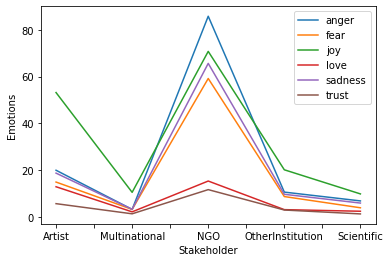

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ConversationsLean.groupby('stakeholder')['anger'].sum().plot(x='stakeholder', y='anger', ax=ax, legend=True)
ConversationsLean.groupby('stakeholder')['fear'].sum().plot(x='stakeholder', y='fear', ax=ax, legend=True)
ConversationsLean.groupby('stakeholder')['joy'].sum().plot(x='stakeholder', y='joy', ax=ax, legend=True)
ConversationsLean.groupby('stakeholder')['love'].sum().plot(x='stakeholder', y='love', ax=ax, legend=True)
ConversationsLean.groupby('stakeholder')['sadness'].sum().plot(x='stakeholder', y='sadness', ax=ax, legend=True)
ConversationsLean.groupby('stakeholder')['trust'].sum().plot(x='stakeholder', y='trust', ax=ax, legend=True)
plt.xlabel('Stakeholder')
plt.ylabel('Emotions')
plt.savefig('q2_first6.png')

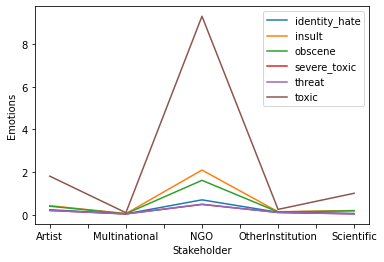

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ConversationsLean.groupby('stakeholder')['identity_hate'].sum().plot(x='stakeholder', y='identity_hate', ax=ax, legend=True)
ConversationsLean.groupby('stakeholder')['insult'].sum().plot(x='stakeholder', y='insult', ax=ax, legend=True)
ConversationsLean.groupby('stakeholder')['obscene'].sum().plot(x='stakeholder', y='obscene', ax=ax, legend=True)
ConversationsLean.groupby('stakeholder')['severe_toxic'].sum().plot(x='stakeholder', y='severe_toxic', ax=ax, legend=True)
ConversationsLean.groupby('stakeholder')['threat'].sum().plot(x='stakeholder', y='threat', ax=ax, legend=True)
ConversationsLean.groupby('stakeholder')['toxic'].sum().plot(x='stakeholder', y='toxic', ax=ax, legend=True)
plt.xlabel('Stakeholder')
plt.ylabel('Emotions')
plt.savefig('q2_last6.png')

For visualizing the emotional levels of the stakeholders, I have considered all of the 12 emotions namely anger, fear, joy, love,
sadness, trust, identity hate, insult, obscene, severe toxic, threat and toxic. I have plotted all of these emotions in a set
of two plots each having six levels of emotions against the stakeholders. In both of the plots above, I could visualize  that
the NGO stakeholders are the most emotional users which are followed by Artist and OtherInstitution. 
From the first plot., it can be understood that the NGO stakeholders possesses a lot of anger against the Coca Cola
due to the negative impact of plastic consumption on the environment and comparatively a low trust.
From the second plot, I can be understood that the NGO stakeholders feel that a lot of toxicity is imparted because of 
the adverse effects that plastic causes on the environment and at the same time NGO have a low value of threat.


## Task 3. Do emotions play a role in the number of retweets and favorites achieved by tweets ? (20 %)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip:  correlations between variables
### Tip:  visualizations relating variables
### Tip:  optionally consider basic regression models to determine the impact of some variables on others (e.g. impact of love on favorite, impact of fear on retweet)

In [14]:
emotional_score = ConversationsLean.groupby('stakeholder')['anger'].sum() + ConversationsLean.groupby('stakeholder')['fear'].sum() + ConversationsLean.groupby('stakeholder')['joy'].sum() + ConversationsLean.groupby('stakeholder')['love'].sum() + ConversationsLean.groupby('stakeholder')['sadness'].sum() + ConversationsLean.groupby('stakeholder')['trust'].sum() + ConversationsLean.groupby('stakeholder')['identity_hate'].sum() + ConversationsLean.groupby('stakeholder')['insult'].sum() + ConversationsLean.groupby('stakeholder')['obscene'].sum() + ConversationsLean.groupby('stakeholder')['severe_toxic'].sum() + ConversationsLean.groupby('stakeholder')['threat'].sum() + ConversationsLean.groupby('stakeholder')['toxic'].sum()
emotional_score

stakeholder
Artist              128.410170
Multinational        23.722485
NGO                 323.086434
OtherInstitution     55.801317
Scientific           31.482870
dtype: float64

In [15]:
Correlation_df = ConversationsLean[['stakeholder','tweet.retweet_count','tweet.favorite_count','anger','fear','joy','love','sadness','trust','identity_hate','insult','obscene','severe_toxic','threat','toxic']]
Correlation_df

,stakeholder,tweet.retweet_count,tweet.favorite_count,anger,fear,joy,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic
0,NGO,47.0,66.0,0.455982,0.131354,0.068569,0.018031,0.322537,0.027230,0.002061,0.002930,0.002914,0.002038,0.001993,0.006145
1,NGO,15.0,21.0,0.544908,0.445253,0.038638,0.014274,0.514795,0.026532,0.002229,0.002969,0.002686,0.001999,0.002120,0.005442
2,NGO,27.0,35.0,0.544908,0.445253,0.038638,0.014274,0.514795,0.026532,0.002229,0.002969,0.002686,0.001999,0.002120,0.005442
3,NGO,45.0,56.0,0.285808,0.310826,0.061857,0.011482,0.424019,0.027274,0.002071,0.003528,0.003506,0.001662,0.001748,0.011816
4,NGO,5.0,10.0,0.215035,0.111665,0.403973,0.048335,0.167924,0.028655,0.002453,0.002630,0.002603,0.002396,0.002266,0.003701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,Scientific,37.0,0.0,0.125110,0.205192,0.307869,0.021639,0.199803,0.032205,0.002583,0.002553,0.002628,0.002520,0.002351,0.003702
443,Scientific,28.0,0.0,0.432412,0.198018,0.098556,0.018792,0.570367,0.033786,0.002264,0.004385,0.004218,0.001900,0.002034,0.021807
444,Multinational,13.0,70.0,0.180171,0.222961,0.377572,0.080467,0.271046,0.051404,0.002474,0.002590,0.002657,0.002344,0.002292,0.003951
445,Multinational,5.0,21.0,0.439692,0.342651,0.071170,0.012816,0.366335,0.024354,0.002263,0.002868,0.002943,0.002096,0.002007,0.006479


In [16]:
correlation = Correlation_df.corr()
correlation

,tweet.retweet_count,tweet.favorite_count,anger,fear,joy,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic
tweet.retweet_count,1.000000,0.651023,0.090206,0.103330,-0.123851,-0.106940,0.140954,-0.097518,-0.019347,-0.014215,-0.013326,-0.038113,-0.037579,-0.016357
tweet.favorite_count,0.651023,1.000000,0.125150,0.067691,-0.115767,-0.088234,0.105691,-0.045693,-0.009979,-0.004687,-0.007140,-0.032897,-0.030150,-0.001861
anger,0.090206,0.125150,1.000000,0.448224,-0.772268,-0.498920,0.645284,-0.452487,0.136401,0.174893,0.174019,-0.040334,0.004069,0.295803
fear,0.103330,0.067691,0.448224,1.000000,-0.695705,-0.427957,0.740662,-0.225597,-0.004650,-0.004273,-0.007169,-0.076635,-0.059549,0.044853
joy,-0.123851,-0.115767,-0.772268,-0.695705,1.000000,0.780607,-0.815044,0.675617,-0.079642,-0.103039,-0.100109,0.052377,0.027748,-0.178969
love,-0.106940,-0.088234,-0.498920,-0.427957,0.780607,1.000000,-0.534648,0.702993,-0.052514,-0.063664,-0.058743,0.018273,0.008800,-0.099040
sadness,0.140954,0.105691,0.645284,0.740662,-0.815044,-0.534648,1.000000,-0.488178,0.035921,0.051982,0.052097,-0.080624,-0.060803,0.136785
trust,-0.097518,-0.045693,-0.452487,-0.225597,0.675617,0.702993,-0.488178,1.000000,-0.084680,-0.110700,-0.110123,0.014698,0.012276,-0.173225
identity_hate,-0.019347,-0.009979,0.136401,-0.004650,-0.079642,-0.052514,0.035921,-0.084680,1.000000,0.990383,0.979411,0.930978,0.944647,0.765469
insult,-0.014215,-0.004687,0.174893,-0.004273,-0.103039,-0.063664,0.051982,-0.110700,0.990383,1.000000,0.994948,0.886991,0.914953,0.830296


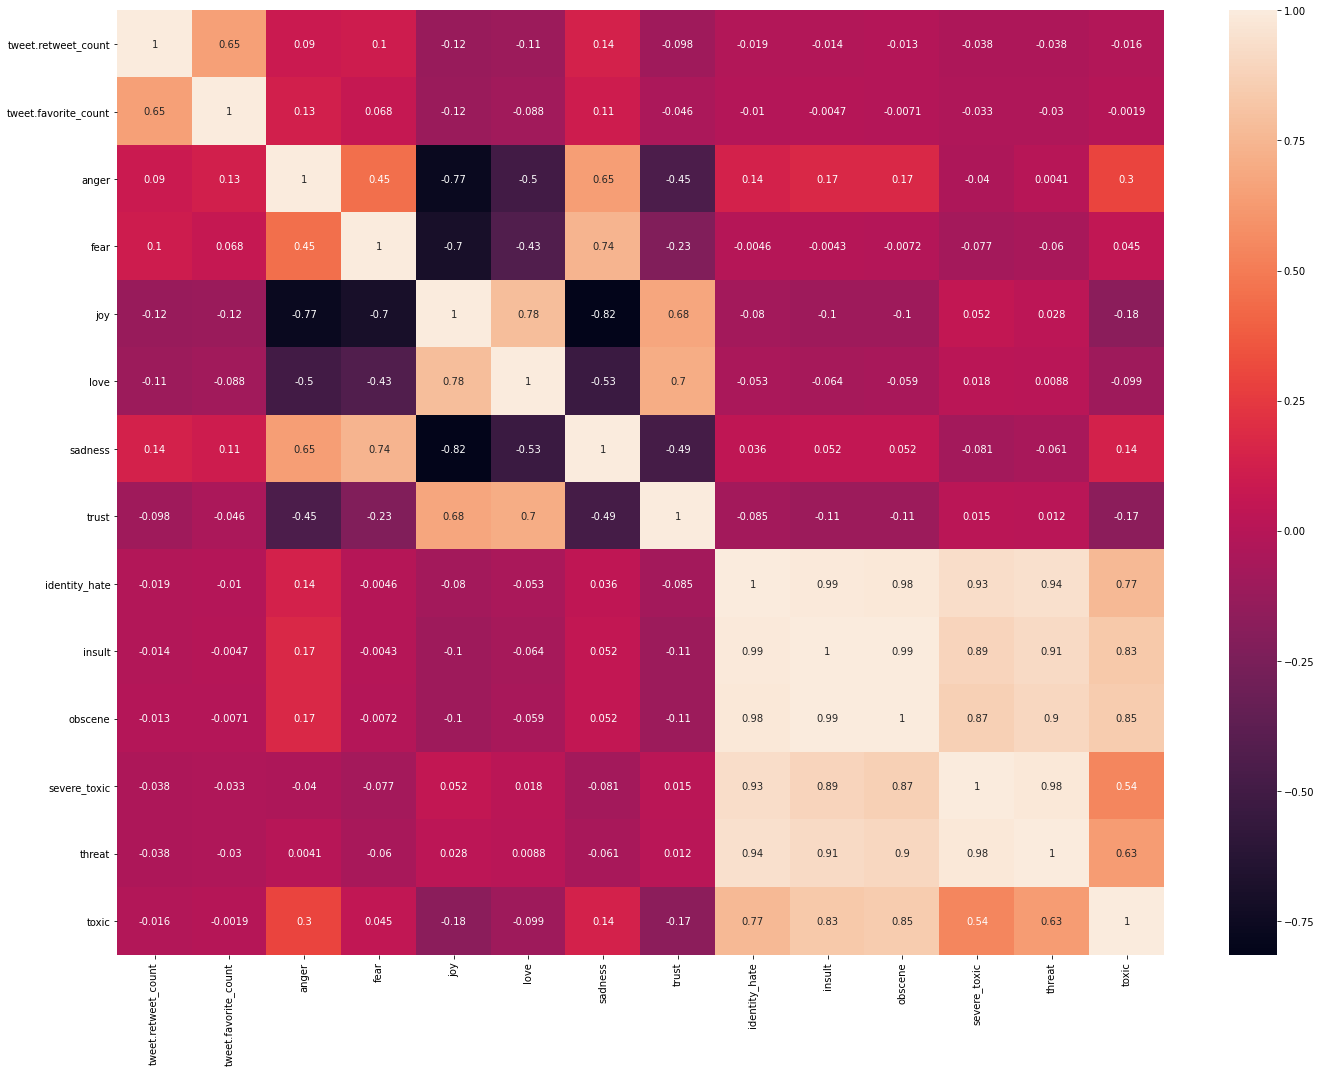

In [17]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(correlation, annot = True)
plt.tight_layout()
plt.savefig('abc.png')
plt.show()

Correlation:
The correlation matrix below shows the correlation coefficients between all the emotions along with 
'tweet.retweet_count' and 'tweet.favourite_count'.
Each cell in the matrix shows the correlation between two specific variables. 
For example, the correlation between ‘love’ and ‘joy’ is 0.74, which indicates that they are strongly positively correlated.
It indicates that more the love, more is the joy.
Another cell above shows that the correlation between ‘fear’ and ‘trust’ is -0.23, which indicates that they are weakly 
negatively correlated. It indicates that more fear is associated with less trust.
Also, one of the cell above shows that the correlation between 'tweet.retweet_count' and ‘anger’ is 0.09, which indicates 
that they are basically not correlated. It indicates that there is very little association between retweet count and anger.
Also I noticed that the correlation coefficients along the diagonal of the table are all equal to 1 because each variable is 
perfectly correlated with itself. These cells are not used for interpretation.
Also, notice that a correlation matrix is perfectly symmetrical. For example, the top right cell shows the exact same value 
as the bottom left cell, in this case it is -0.016. This is because both cells are measuring the correlation between 
'tweet.retweet_count' and ‘toxic’.


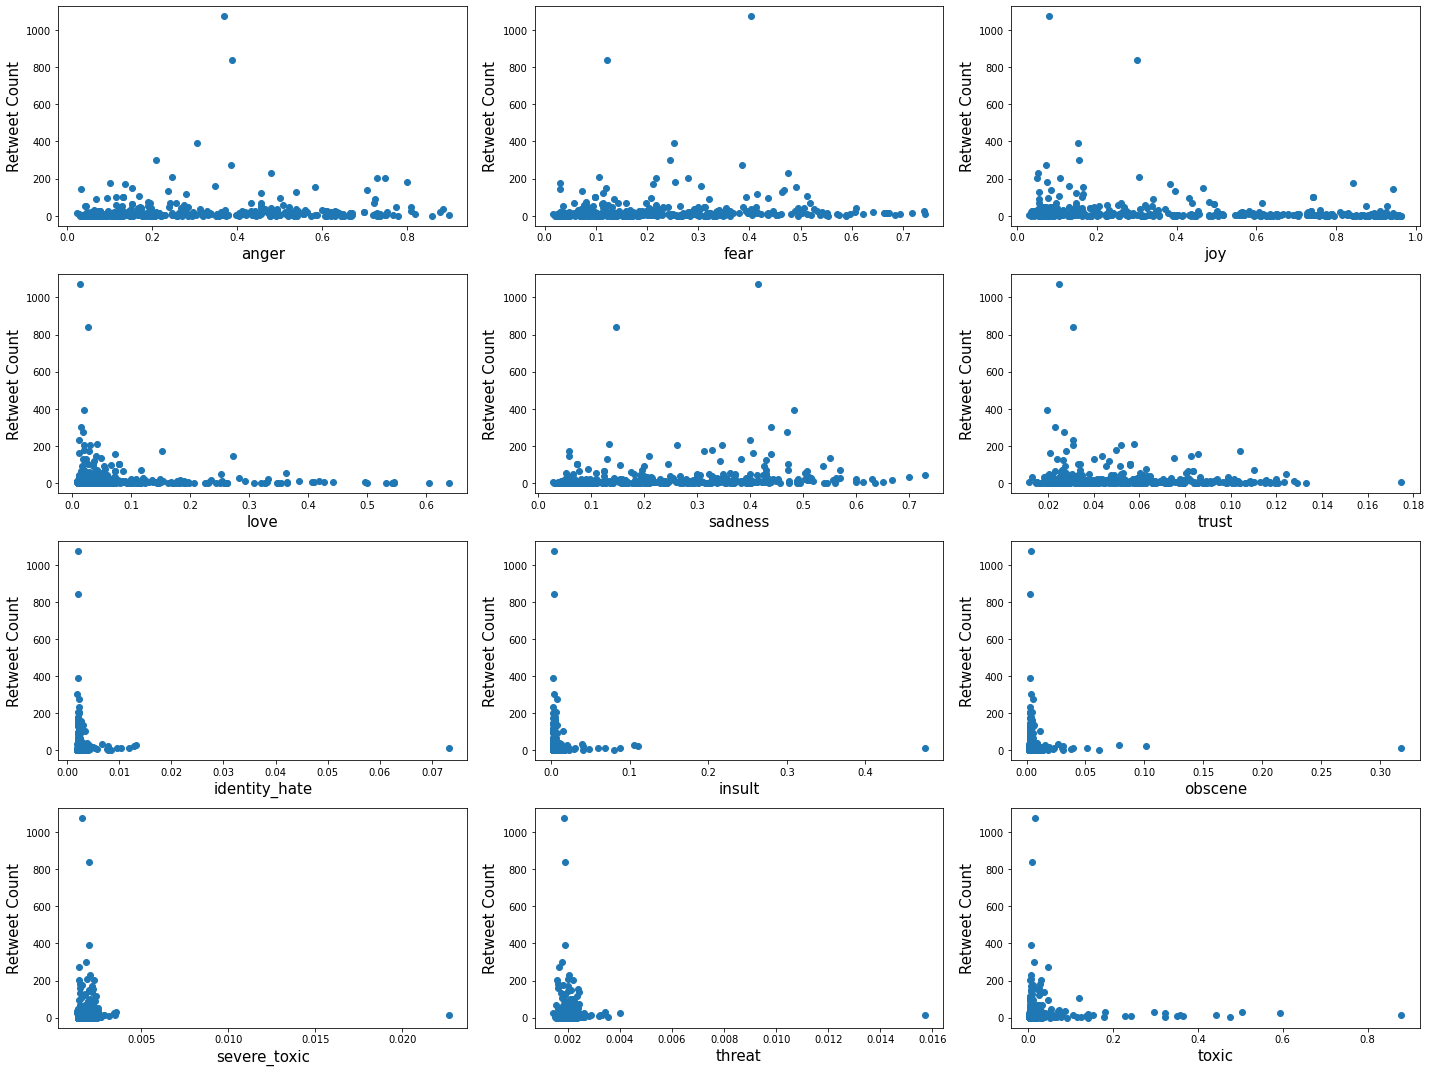

In [18]:
emotions1 = ['anger','fear','joy','love','sadness','trust','identity_hate','insult','obscene','severe_toxic','threat','toxic']
fig, ax = plt.subplots(figsize = (20,15))
p= 1
for i in emotions1:
    
    plt.subplot(4, 3, p)
    plt.scatter(ConversationsLean[i],ConversationsLean['tweet.retweet_count'])
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('Retweet Count', fontsize = 15)
    p+=1

plt.tight_layout()
plt.show()

Interpretation:
To understand the relationship more efficiently, I have used Scatter plot. The Scatter Plot basically shows us 
the density is been distributed and we can therefore differentiate the impact of all the emotions on the retweet
count.The above output illustrates the impact of all the emotions on the Retweet Count.


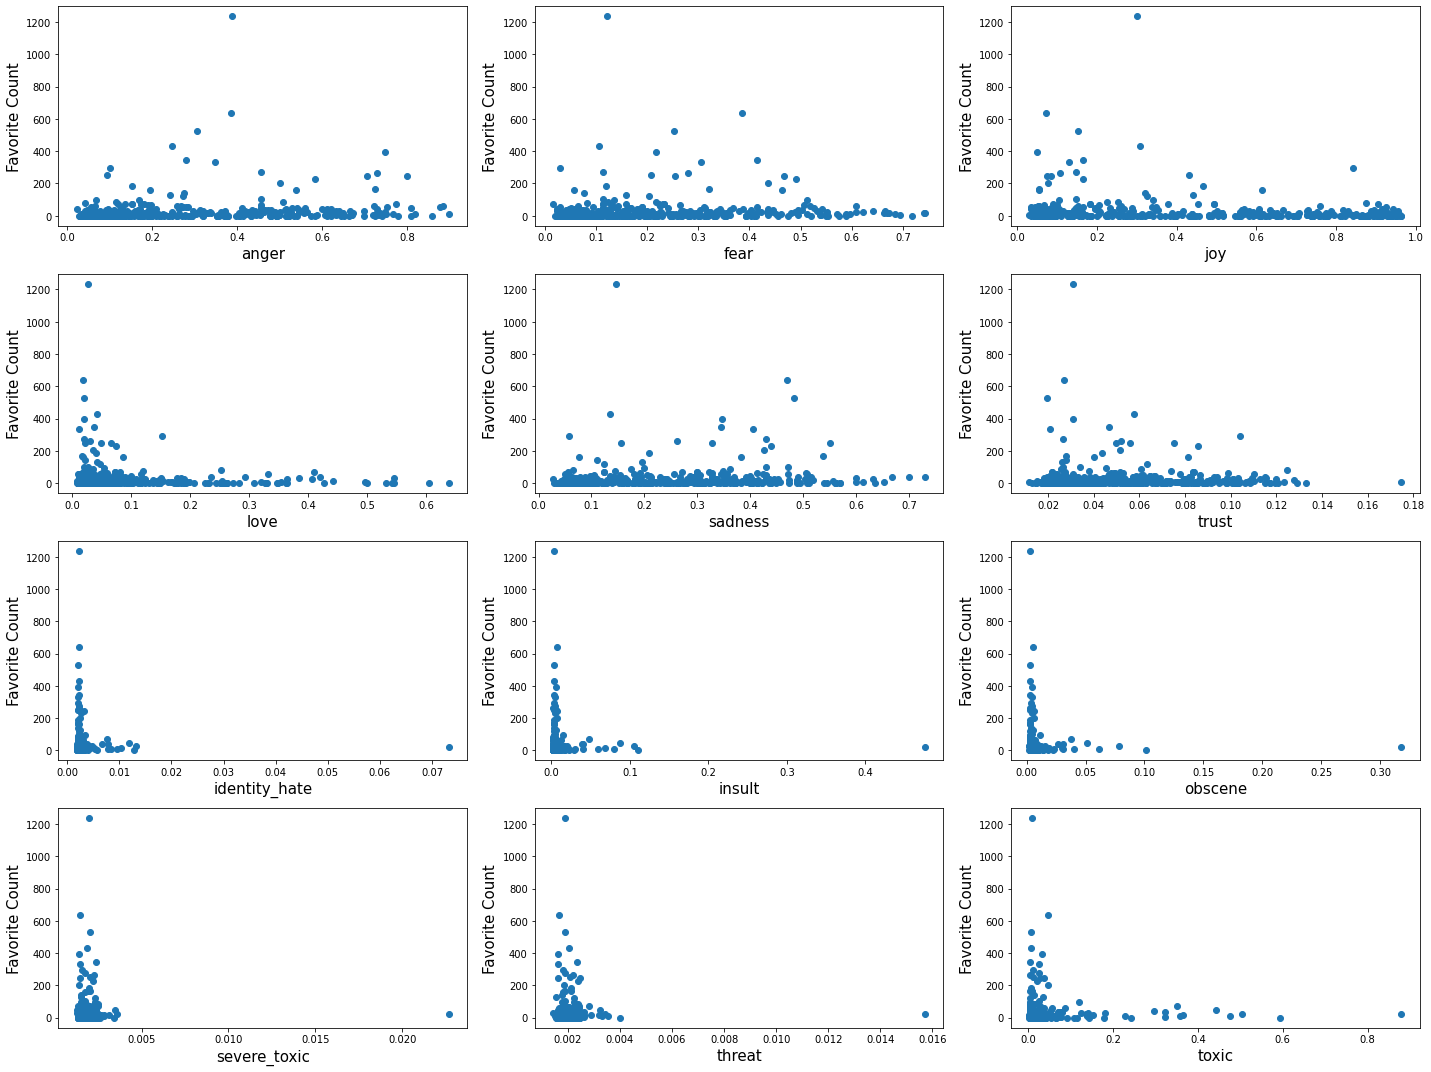

In [19]:
emotions2 = ['anger','fear','joy','love','sadness','trust','identity_hate','insult','obscene','severe_toxic','threat','toxic']
fig, ax = plt.subplots(figsize = (20,15))
p= 1
for i in emotions2:
    
    plt.subplot(4, 3, p)
    plt.scatter(ConversationsLean[i],ConversationsLean['tweet.favorite_count'])
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('Favorite Count', fontsize = 15)
    p+=1

plt.tight_layout()
plt.show()

Similarly, the for the above output I have used Scatter plot which illustrates the impact of all the Emotions on the Favorite Count.

In [20]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.linear_model import LinearRegression

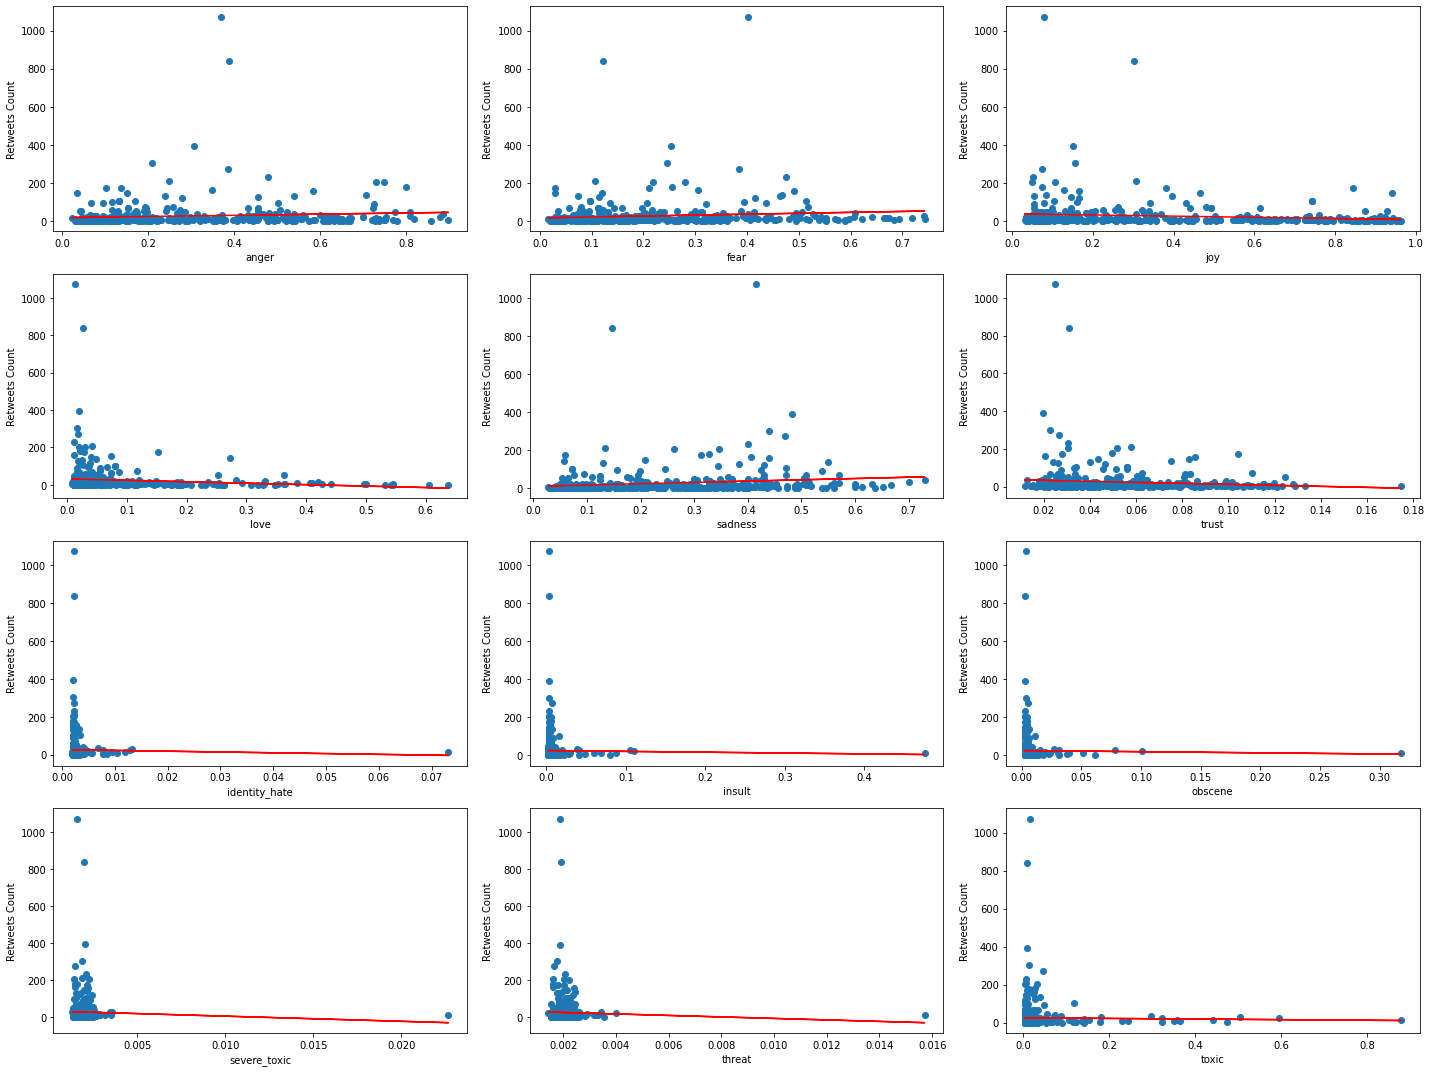

In [22]:
emotions = ['anger','fear','joy','love','sadness','trust','identity_hate','insult','obscene','severe_toxic','threat','toxic']
fig, ax = plt.subplots(figsize = (20,15))
p= 1
for i in emotions:
    x = ConversationsLean[i].values.reshape(-1, 1)
    y = ConversationsLean['tweet.retweet_count'].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(x,y) 
    Y_pred = linear_regressor.predict(x) 
    
    plt.subplot(4, 3, p)
    plt.scatter(x,y)
    plt.xlabel(i, fontsize = 10)
    plt.ylabel('Retweets Count', fontsize = 10)
    plt.plot(x, Y_pred, color='red')
    p+=1
plt.savefig('reg_retweet.png')
plt.tight_layout()
plt.show()

Interpretation:
Regression for Emotions along with Retweet Count:
    
I have customized the scatterplot by adding a regression fit line to the scatterplot to model the relationship in my data. 
It also helps me to understand the strength of the relationship. By accessing how closely the data fit the model to estimate 
the strength of the relationship between both the variables. 
Like in the Regression for Retweet Count, I can observe that in some of the emotions like anger, fear, joy there is a stronger 
relationship, whereas there is a weaker relationship in the case of severe toxic, threat and toxic.
The above output illustrates the Regression for all the emotions along with the Retweet Count.


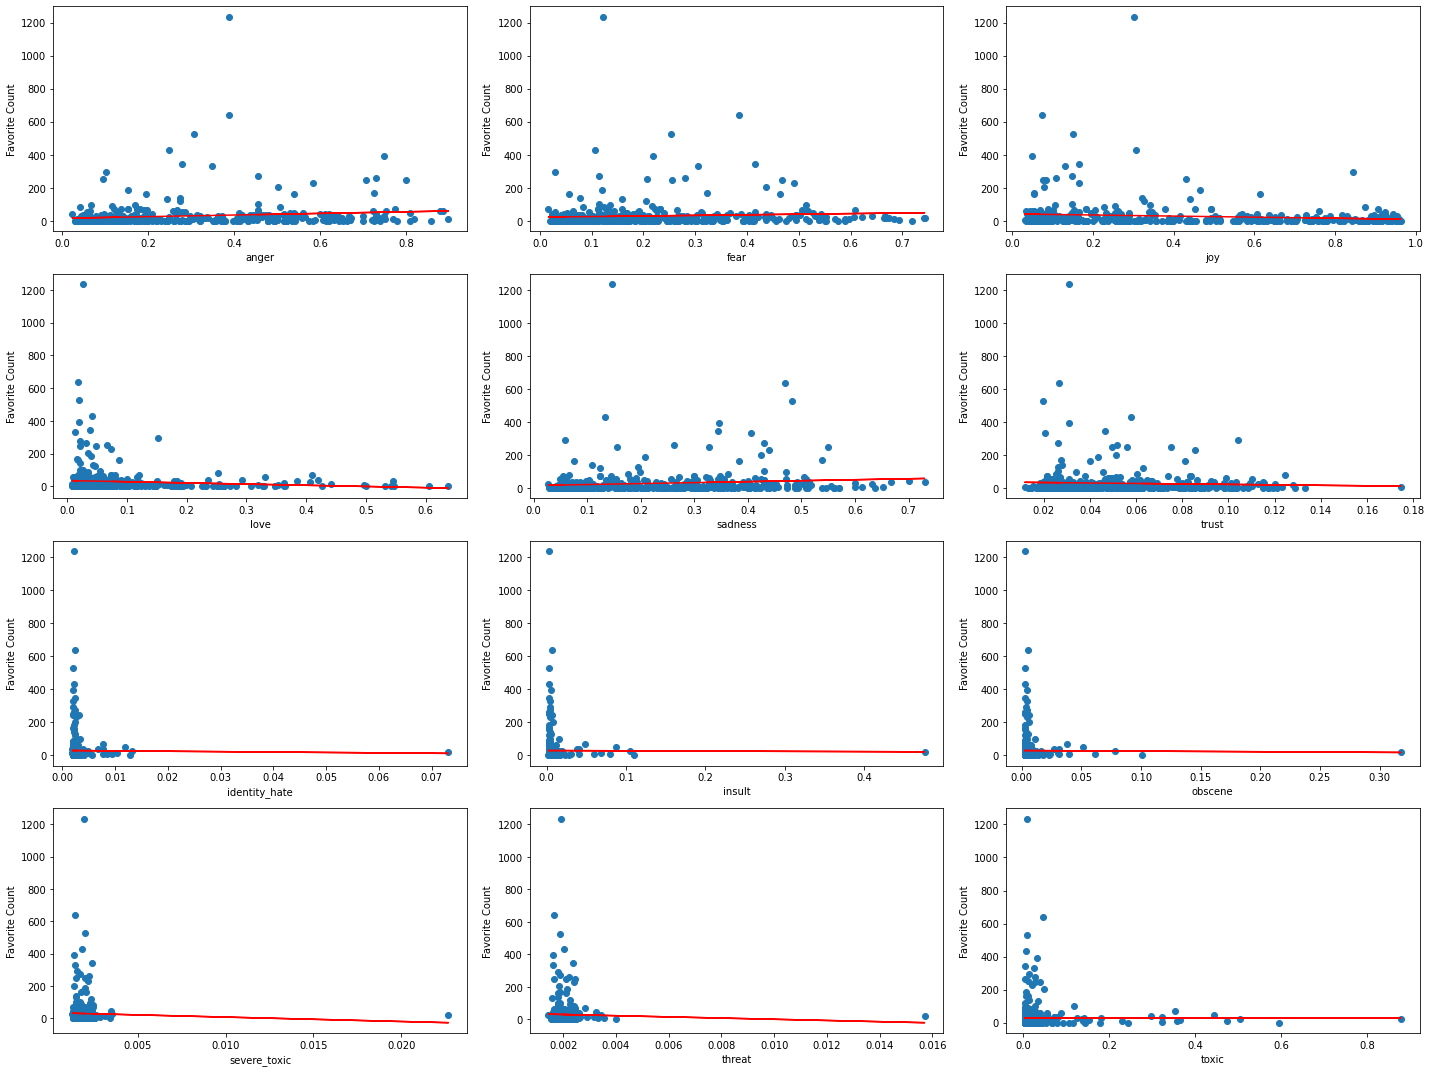

In [23]:
emotions = ['anger','fear','joy','love','sadness','trust','identity_hate','insult','obscene','severe_toxic','threat','toxic']
fig, ax = plt.subplots(figsize = (20,15))
p= 1
for i in emotions:
    x = ConversationsLean[i].values.reshape(-1, 1)
    y = ConversationsLean['tweet.favorite_count'].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(x,y) 
    Y_pred = linear_regressor.predict(x) 
    
    plt.subplot(4,3,p)
    plt.scatter(x,y)
    plt.xlabel(i, fontsize = 10)
    plt.ylabel('Favorite Count', fontsize = 10)
    plt.plot(x, Y_pred, color='red')
    p+=1
plt.savefig('reg_favorite.png')
plt.tight_layout()
plt.show()

Interpretation:
Regression for Emotions along with Favorite Count:

In the Regression for Favorite Count, I can observe that in some of the emotions like anger, fear, joy there is a stronger relationship,
whereas there is a weaker relationship in the case of severe toxic, threat and toxic.
The above output illustrates the Regression for all the emotions along with the Favorite Count.


## Task 4. Develop and apply a function which: (1) extracts ALL the hashtags from the column 'tweet.full_text', (2) saves the result as a new column (10%)
### For each Task please: (1) develop the code required and (2) provide a brief discussion and interpretation of the results

### Tip: consider lambda functions applied to a dataframe

### Tip: refer to the module labs for examples on how to use REGEX in the context of pandas dataframes

In [24]:
import re

In [25]:
ConversationsLean

,Unnamed: 0,tweet.created_at,tweet.id,tweet.full_text,tweet.entities,tweet.user.id,tweet.user.screen_name,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,...,love,sadness,trust,identity_hate,insult,obscene,severe_toxic,threat,toxic,stakeholder
0,0,2019-03-05 00:55:05.000000,1.102734e+18,"The Recycling Myth. “I hear the excuse all the time, ‘I use single-use plastic, but I recycle it, so it’s OK.’ Unfortunately, that is not the truth.” #plasticpollutes #recyclingisnottheanswer https://t.co/yD75iVbd6k https://t.co/ocQbPhjqLN","{'hashtags': [{'text': 'plasticpollutes', 'indices': [150, 166]}, {'text': 'recyclingisnottheanswer', 'indices': [167, 191]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yD75iVbd6k', 'expanded_url': 'http://ow.ly/hiBp30nTeMf', 'display_url': 'ow.ly/hiBp30nTeMf', 'indices': [192, 215]}], 'media': [{'id': 1102734240221937664, 'id_str': '1102734240221937664', 'indices': [2...",71310291,PlasticPollutes,45953,6595,13453,...,0.018031,0.322537,0.027230,0.002061,0.002930,0.002914,0.002038,0.001993,0.006145,NGO
1,1,2018-10-04 17:01:10.000000,1.047894e+18,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/SCkJEb2U2v,"{'hashtags': [{'text': 'recycling', 'indices': [70, 80]}, {'text': 'plasticpollution', 'indices': [124, 141]}, {'text': 'plastics', 'indices': [183, 192]}, {'text': 'plasticpollutes', 'indices': [217, 233]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/47i9YjdxQv', 'expanded_url': 'https://bit.ly/2NnVI1Z', 'display_url': 'bit.ly/2NnVI1Z', 'indices': [193, 216]}], 'media'...",71310291,PlasticPollutes,45953,6595,13453,...,0.014274,0.514795,0.026532,0.002229,0.002969,0.002686,0.001999,0.002120,0.005442,NGO
2,2,2018-10-04 14:33:54.000000,1.047857e+18,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/lEMEj4QECA,"{'hashtags': [{'text': 'recycling', 'indices': [70, 80]}, {'text': 'plasticpollution', 'indices': [124, 141]}, {'text': 'plastics', 'indices': [183, 192]}, {'text': 'plasticpollutes', 'indices': [217, 233]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/47i9YjdxQv', 'expanded_url': 'https://bit.ly/2NnVI1Z', 'display_url': 'bit.ly/2NnVI1Z', 'indices': [193, 216]}], 'media'...",71310291,PlasticPollutes,45953,6595,13453,...,0.014274,0.514795,0.026532,0.002229,0.002969,0.002686,0.001999,0.002120,0.005442,NGO
3,3,2018-08-16 21:20:06.000000,1.030203e+18,Our plastic footprint: #reuse to take the pressure off #recycling https://t.co/faSl1s9pgx,"{'hashtags': [{'text': 'reuse', 'indices': [23, 29]}, {'text': 'recycling', 'indices': [55, 65]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/faSl1s9pgx', 'expanded_url': 'http://ow.ly/rsi530lpTfM', 'display_url': 'ow.ly/rsi530lpTfM', 'indices': [66, 89]}]}",71310291,PlasticPollutes,45953,6595,13453,...,0.011482,0.424019,0.027274,0.002071,0.003528,0.003506,0.001662,0.001748,0.011816,NGO
4,4,2018-03-28 21:35:09.000000,9.791097e+17,Is it time to remake recycling? Listen to the story to find out more. #recyclingisnotenough #breakfreefromplastic https://t.co/0EYuBWulSr,"{'hashtags': [{'text': 'recyclingisnotenough', 'indices': [71, 92]}, {'text': 'breakfreefromplastic', 'indices': [93, 114]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0EYuBWulSr', 'expanded_url': 'https://the1a.org/shows/2018-03-22/recycling-show', 'display_url': 'the1a.org/shows/2018-03-…', 'indices': [115, 138]}]}",85732762,5gyres,24165,4022,2025,...,0.048335,0.167924,0.028655,0.002453,0.002630,0.002603,0.002396,0.002266,0.003701,NGO
...,...,...,...,...,...,...,...,...,.

In [26]:
ConversationsLean['hashtags_extracted']=ConversationsLean['tweet.full_text'].apply(lambda x:re.findall(r'\B(\#[a-zA-Z]+\b)(?!;)', x))

In [27]:
ConversationsLean[['tweet.full_text','hashtags_extracted']].head(30)

,tweet.full_text,hashtags_extracted
0,"The Recycling Myth. “I hear the excuse all the time, ‘I use single-use plastic, but I recycle it, so it’s OK.’ Unfortunately, that is not the truth.” #plasticpollutes #recyclingisnottheanswer https://t.co/yD75iVbd6k https://t.co/ocQbPhjqLN","[#plasticpollutes, #recyclingisnottheanswer]"
1,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/SCkJEb2U2v,"[#recycling, #plasticpollution, #plastics, #plasticpollutes]"
2,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/lEMEj4QECA,"[#recycling, #plasticpollution, #plastics, #plasticpollutes]"
3,Our plastic footprint: #reuse to take the pressure off #recycling https://t.co/faSl1s9pgx,"[#reuse, #recycling]"
4,Is it time to remake recycling? Listen to the story to find out more. #recyclingisnotenough #breakfreefromplastic https://t.co/0EYuBWulSr,"[#recyclingisnotenough, #breakfreefromplastic]"
5,"Exciting innovation in the world of #plastic packaging and #recycling in collaboration with some of our members on the #UKPlasticsPact. New #tech designed to transform how packaging is used, recycled, sorted and reprocessed. #CircularEconomy https://t.co/8Tk76Q4UAH","[#plastic, #recycling, #UKPlasticsPact, #tech, #CircularEconomy]"
6,Local authorities are collecting 10% more plastic packaging since 2013 #ukplasticspact #changeplasticforgood #recycling https://t.co/k6iiglcVwm https://t.co/bcVJ3Cnrdw,"[#ukplasticspact, #changeplasticforgood, #recycling]"
7,How much #plastic are we creating? Our latest report examines the amount of plastics put on the UK market in the last year – and what we do with it #plastics #recycling #ukplasticspact https://t.co/k6iiglcVwm https://t.co/FtwyXBBq2O,"[#plastic, #plastics, #recycling, #ukplasticspact]"
8,New report shows more focus needed to develop sustainable end markets for recycled #plastics #changeplasticforgood #recycling https://t.co/k6iiglcVwm,"[#plastics, #changeplasticforgood, #recycling]"
9,We're looking to fund projects which are collecting and recycling non-household business waste. Closing date Wednesday! #funding #recycling https://t.co/PR7bBefCyX https://t.co/B0miOw3i7c,"[#funding, #recycling]"


Interpretation:
In the above question, I had to extract the hashtags that were present in the 'tweet.full_text' column of the the ConversationsLean 
dataframe. I have used REGEX to extract the hashtags from the data and then applied the lambda function to differentiate it from the
'tweet.full_text'. Thereby making a new column altogether, called as 'hashtags_extracted'.

## Task 5. what are the differences between stakeholders ?   (30%)

### Tip: explore differences in terms of emotions, popularity, hashtags used, number of tweets,etc

In [28]:
ConversationsLean.groupby('stakeholder')['tweet.user.followers_count'].max()

stakeholder
Artist                69322
Multinational        341175
NGO                 1875552
OtherInstitution      31772
Scientific            11810
Name: tweet.user.followers_count, dtype: int64

Interpretation: 
    From the above output we can figure out that the NGO stakeholders are the ones with the maximum number of followers of count 1875552, 
    followed by the others like Multinationals, Artists, OtherInstitution and Scientific stakeholders have the least number of counts.

In [29]:
ConversationsLean.groupby('stakeholder')['tweet.user.friends_count'].max()

stakeholder
Artist               2001
Multinational       13732
NGO                 33315
OtherInstitution     1901
Scientific           1816
Name: tweet.user.friends_count, dtype: int64

Interpretation: From the above output we can figure out that the NGO stakeholders are the ones with the maximum number of friends
    with the count of 33315, followed by the later like Multinationals, Artists, OtherInstitution and Scientific stakeholders have the 
    least number of friends.

In [30]:
ConversationsLean.groupby('stakeholder')['tweet.retweet_count'].sum()

stakeholder
Artist               281.0
Multinational        391.0
NGO                 9322.0
OtherInstitution     512.0
Scientific           680.0
Name: tweet.retweet_count, dtype: float64

Interpretation: From the above output we can figure out that the NGO stakeholders are the ones with the maximum number of retweets
    with the count of 9322.0 , followed by the later like Scientific, OtherInstitution, Multinational and Artists stakeholders having the 
    the least number of retweets of a count 281.0.

In [31]:
ConversationsLean.groupby('stakeholder')['tweet.user.favourites_count'].max()

stakeholder
Artist               4533
Multinational        8060
NGO                 24725
OtherInstitution     1963
Scientific          17795
Name: tweet.user.favourites_count, dtype: int64

Interpretation: From the above output we can figure out that the NGO stakeholders are the ones with the maximum number of favourites
    with the count of 24725 , followed by the later like Scientific, Multinational, Artists and finally OtherInstitution stakeholders
    having the the least number of favourites of a count 1963.

In [32]:
number_tweets = ConversationsLean.groupby('stakeholder')['tweet.user.id'].count()
number_tweets

stakeholder
Artist              104
Multinational        20
NGO                 241
OtherInstitution     51
Scientific           24
Name: tweet.user.id, dtype: int64

Interpretation: From the above output we can figure out that the NGO stakeholders are the ones with the maximum number of tweets
    with the count of 241 , followed by the later like Artists, OtherInstitution, Scientific and finally Multinational stakeholders
    having the the least number of favourites of a count 20.

In [33]:
popularity = ConversationsLean.groupby('stakeholder')['tweet.user.followers_count'].max() + ConversationsLean.groupby('stakeholder')['tweet.user.favourites_count'].max()
popularity

stakeholder
Artist                73855
Multinational        349235
NGO                 1900277
OtherInstitution      33735
Scientific            29605
dtype: int64

Interpretation: From the above output we can figure out that the NGO stakeholders are the ones who are the most popular 
    with a popularity score of 1900277, followed by the later like Multinational, Artist, OtherInstitution and finally Scientific 
    stakeholders having the the least number of favourites of a count 29605.

In [34]:
ConversationsLean['tweet.year'] = pd.DatetimeIndex(ConversationsLean['tweet.created_at']).year
ConversationsLean['tweet.year'].head(30)

0     2019
1     2018
2     2018
3     2018
4     2018
5     2019
6     2019
7     2019
8     2019
9     2019
10    2019
11    2019
12    2019
13    2019
14    2019
15    2019
16    2019
17    2019
18    2019
19    2019
20    2018
21    2018
22    2018
23    2018
24    2018
25    2018
26    2018
27    2018
28    2017
29    2016
Name: tweet.year, dtype: int64

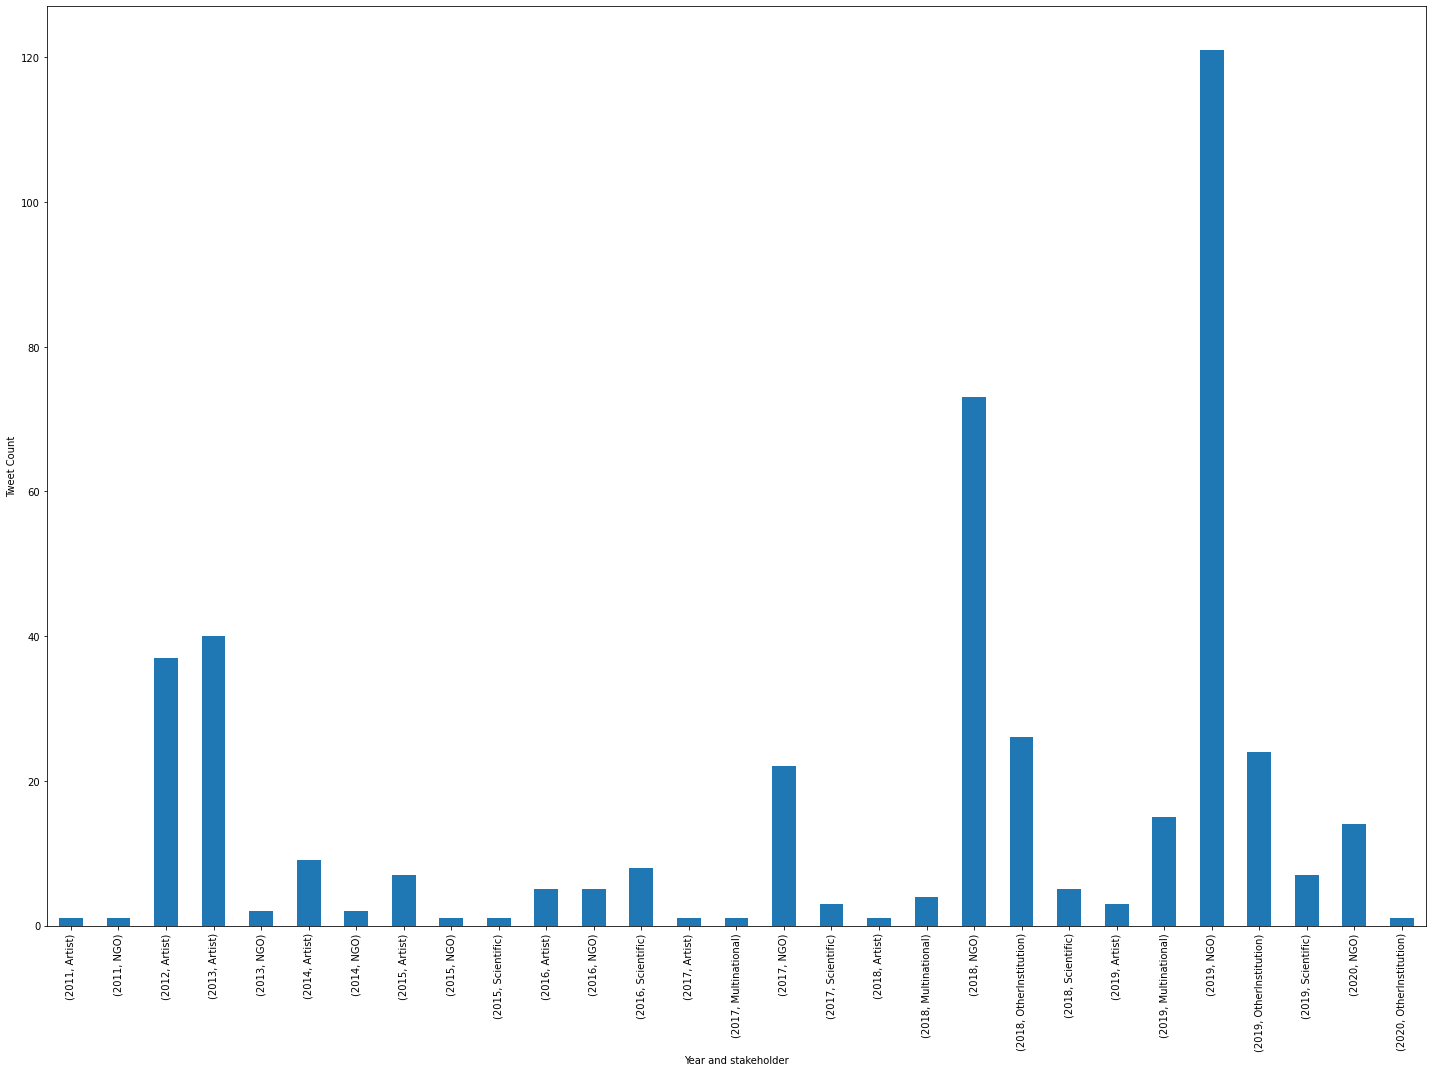

In [35]:
fig, ax = plt.subplots(figsize=(20,15))
ConversationsLean.sort_values(by="tweet.year", ascending=True).groupby(['tweet.year', 'stakeholder'])['tweet.id'].count().plot.bar()
plt.xlabel('Year and stakeholder')
plt.ylabel('Tweet Count')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.savefig('Yearly Tweets.png')

Interpretation: From the above output, I have observed the progress of the stakeholders with the past few years from 2011 to 2020.
    It shows the number of tweets that the stakeholders have tweeted in all showing the most active and the least active stakeholder 
    in all the past years.

In [36]:
emotional_score = ConversationsLean.groupby('stakeholder')['anger'].sum() + ConversationsLean.groupby('stakeholder')['fear'].sum() + ConversationsLean.groupby('stakeholder')['joy'].sum() + ConversationsLean.groupby('stakeholder')['love'].sum() + ConversationsLean.groupby('stakeholder')['sadness'].sum() + ConversationsLean.groupby('stakeholder')['trust'].sum() + ConversationsLean.groupby('stakeholder')['identity_hate'].sum() + ConversationsLean.groupby('stakeholder')['insult'].sum() + ConversationsLean.groupby('stakeholder')['obscene'].sum() + ConversationsLean.groupby('stakeholder')['severe_toxic'].sum() + ConversationsLean.groupby('stakeholder')['threat'].sum() + ConversationsLean.groupby('stakeholder')['toxic'].sum()
emotional_score

stakeholder
Artist              128.410170
Multinational        23.722485
NGO                 323.086434
OtherInstitution     55.801317
Scientific           31.482870
dtype: float64

In [37]:
ConversationsLean['No_of_hashtags']=ConversationsLean['tweet.full_text'].apply(lambda x:len(re.findall(r'\B(\#[a-zA-Z]+\b)(?!;)', x)))
ConversationsLean.groupby(['stakeholder'])['No_of_hashtags'].sum()

stakeholder
Artist               78
Multinational        50
NGO                 462
OtherInstitution    118
Scientific           38
Name: No_of_hashtags, dtype: int64

Interpretation: From the above output we can figure out that the NGO stakeholders are the ones with the maximum number of hashtags of 462,
     followed by the later like OtherInstitution, Artist, Multinational and finally 
    Scientific stakeholders having the the least number of hashtags used of a count 38.

In [38]:
dictionaryOfStakeholders={'Stakeholder': ['Artist', 'Multinational','NGO','OtherInstitution','Scientific'],
                        'No. of Tweets': ['104', '20','241','51','24'],
                        'No. of Retweets': ['281.0', '391.0','9322.0','512.0','680.0'],
                        'Popularity Score': ['73855', '349235','1900277','33735','29605']}

In [39]:
DataFrameOfStakeholders = pd.DataFrame(dictionaryOfStakeholders)
DataFrameOfStakeholders

,Stakeholder,No. of Tweets,No. of Retweets,Popularity Score
0,Artist,104,281.0,73855
1,Multinational,20,391.0,349235
2,NGO,241,9322.0,1900277
3,OtherInstitution,51,512.0,33735
4,Scientific,24,680.0,29605


Interpretation:
    A new dataframe showing the Number of Tweets, Number of Retweets and the Popularity Score against the stakeholders.

In [40]:
ConversationsLean[ConversationsLean['tweet.full_text'].str.contains('(r|R)ecycling', regex = True)]

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Unnamed: 0,tweet.created_at,tweet.id,tweet.full_text,tweet.entities,tweet.user.id,tweet.user.screen_name,tweet.user.followers_count,tweet.user.friends_count,tweet.user.favourites_count,...,identity_hate,insult,obscene,severe_toxic,threat,toxic,stakeholder,hashtags_extracted,tweet.year,No_of_hashtags
0,0,2019-03-05 00:55:05.000000,1.102734e+18,"The Recycling Myth. “I hear the excuse all the time, ‘I use single-use plastic, but I recycle it, so it’s OK.’ Unfortunately, that is not the truth.” #plasticpollutes #recyclingisnottheanswer https://t.co/yD75iVbd6k https://t.co/ocQbPhjqLN","{'hashtags': [{'text': 'plasticpollutes', 'indices': [150, 166]}, {'text': 'recyclingisnottheanswer', 'indices': [167, 191]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yD75iVbd6k', 'expanded_url': 'http://ow.ly/hiBp30nTeMf', 'display_url': 'ow.ly/hiBp30nTeMf', 'indices': [192, 215]}], 'media': [{'id': 1102734240221937664, 'id_str': '1102734240221937664', 'indices': [2...",71310291,PlasticPollutes,45953,6595,13453,...,0.002061,0.002930,0.002914,0.002038,0.001993,0.006145,NGO,"[#plasticpollutes, #recyclingisnottheanswer]",2019,2
1,1,2018-10-04 17:01:10.000000,1.047894e+18,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/SCkJEb2U2v,"{'hashtags': [{'text': 'recycling', 'indices': [70, 80]}, {'text': 'plasticpollution', 'indices': [124, 141]}, {'text': 'plastics', 'indices': [183, 192]}, {'text': 'plasticpollutes', 'indices': [217, 233]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/47i9YjdxQv', 'expanded_url': 'https://bit.ly/2NnVI1Z', 'display_url': 'bit.ly/2NnVI1Z', 'indices': [193, 216]}], 'media'...",71310291,PlasticPollutes,45953,6595,13453,...,0.002229,0.002969,0.002686,0.001999,0.002120,0.005442,NGO,"[#recycling, #plasticpollution, #plastics, #plasticpollutes]",2018,4
2,2,2018-10-04 14:33:54.000000,1.047857e+18,USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/lEMEj4QECA,"{'hashtags': [{'text': 'recycling', 'indices': [70, 80]}, {'text': 'plasticpollution', 'indices': [124, 141]}, {'text': 'plastics', 'indices': [183, 192]}, {'text': 'plasticpollutes', 'indices': [217, 233]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/47i9YjdxQv', 'expanded_url': 'https://bit.ly/2NnVI1Z', 'display_url': 'bit.ly/2NnVI1Z', 'indices': [193, 216]}], 'media'...",71310291,PlasticPollutes,45953,6595,13453,...,0.002229,0.002969,0.002686,0.001999,0.002120,0.005442,NGO,"[#recycling, #plasticpollution, #plastics, #plasticpollutes]",2018,4
3,3,2018-08-16 21:20:06.000000,1.030203e+18,Our plastic footprint: #reuse to take the pressure off #recycling https://t.co/faSl1s9pgx,"{'hashtags': [{'text': 'reuse', 'indices': [23, 29]}, {'text': 'recycling', 'indices': [55, 65]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/faSl1s9pgx', 'expanded_url': 'http://ow.ly/rsi530lpTfM', 'display_url': 'ow.ly/rsi530lpTfM', 'indices': [66, 89]}]}",71310291,PlasticPollutes,45953,6595,13453,...,0.002071,0.003528,0.003506,0.001662,0.001748,0.011816,NGO,"[#reuse, #recycling]",2018,2
4,4,2018-03-28 21:35:09.000000,9.791097e+17,Is it time to remake recycling? Listen to the story to find out more. #recyclingisnotenough #breakfreefromplastic https://t.co/0EYuBWulSr,"{'hashtags': [{'text': 'recyclingisnotenough', 'indices': [71, 92]}, {'text': 'breakfreefromplastic', 'indices': [93, 114]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0EYuBWulSr', 'expanded_url': 'https://the1a.org/shows/2018-03-22/recycling-show', 'display_url': 'the1a.org/shows/2018-03-…', 'indices': [115, 138]}]}",85732762,5gyres,

Interpretation:
    These are the various data having Recycling or recycling used in the 'tweet.full_text' column. There are a total of 64 enteries with the word used Recycling or recycling

In [41]:
ConversationsLean['No_of_hashtags']=ConversationsLean['tweet.full_text'].apply(lambda x:len(re.findall(r'\B(\#[a-zA-Z]+\b)(?!;)', x)))

Text(0, 0.5, 'Average number of hashtags')

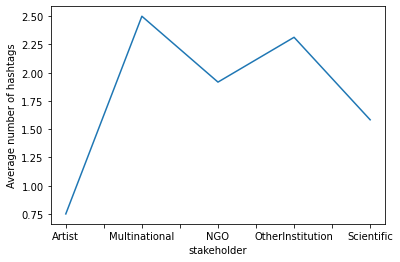

In [45]:
ConversationsLean.groupby(['stakeholder'])['No_of_hashtags'].mean().plot()
plt.ylabel('Average number of hashtags')

Text(0, 0.5, 'Average number of retweets per tweet')

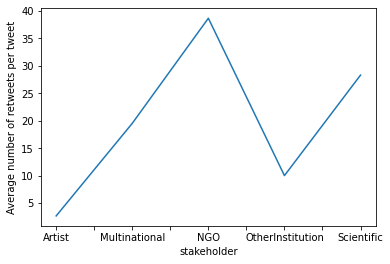

In [46]:
ConversationsLean.groupby(['stakeholder'])['tweet.retweet_count'].mean().plot()
plt.ylabel('Average number of retweets per tweet')
#Avg number of retweets per tweet for each stakeholder

## Task 6. what are your recommendations for Coca Cola as far as social media is concerned ?   (20%)

My recommendations for Coca Cola as far as social media is concerned is that because of the excessive use of plastic the environment
is facing a lot of challenges. Not just for any particular living being like man or anything, plastic is harmful for the animals who consume them 
and also for the sea bodies who die every year due to the excessive dumpage of plastics in the ocean.
The NGO stake holders are the ones who are campaigning against the Coca Cola industry to ban plastics for the safety of mankind.
They are also emotionally concerned as we could see in the plots shown above that the NGO stakeholders are the ones with the maximum number
of stakeholders who are genuinely concerned. The Multinationals are the ones benefitting from the plastics since most of their 
deals are with packaging and with Coca Cola.
We can also go by the popularity that the NGOS are gaining which might be a threat to the Coca Cola industries.
Seeing the number of retweets also the NGOs are gaining their own side of go.
So I would suggest Coca Cola to think of producing platics which can be easily recycled and find more ways of recycling plastic, 
so that it doesnt cause harm to the environment or anyone else.